9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

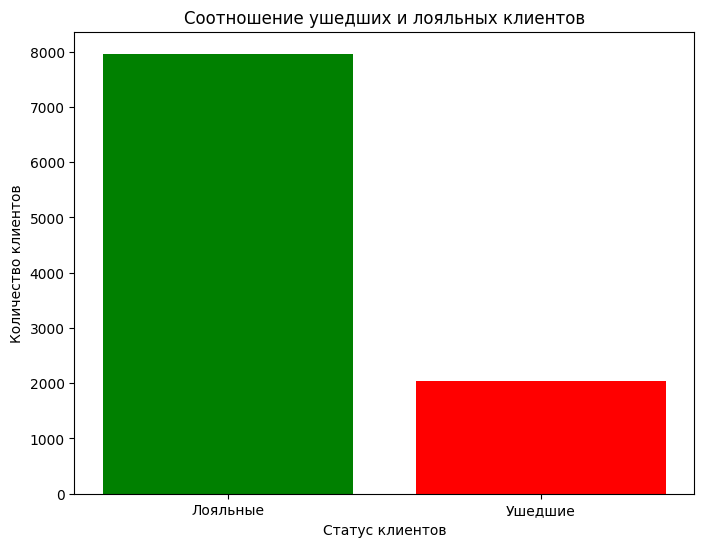

Соотношение ушедших и лояльных клиентов: 2037 ушедших клиентов к 7963 лояльных клиентов.


In [166]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('churn.csv')

# Подсчитаем количество ушедших и лояльных клиентов
loyal_customers = data[data['Exited'] == 0].shape[0]
churned_customers = data[data['Exited'] == 1].shape[0]

# Строим график
plt.figure(figsize=(8, 6))
plt.bar(['Лояльные', 'Ушедшие'], [loyal_customers, churned_customers], color=['green', 'red'])
plt.xlabel('Статус клиентов')
plt.ylabel('Количество клиентов')
plt.title('Соотношение ушедших и лояльных клиентов')
plt.show()

# Выводим комментарий
print(f"Соотношение ушедших и лояльных клиентов: {churned_customers} ушедших клиентов к {loyal_customers} лояльных клиентов.")

Большинство клиентов (более 75%) остаются лояльными и продолжают пользоваться услугами банка.

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

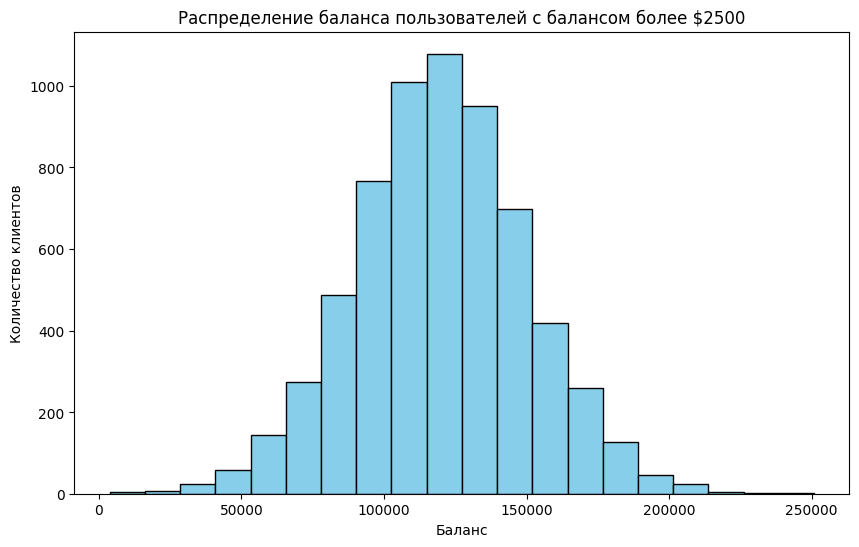

In [167]:
# Фильтруем данные по балансу более 2500 долларов
filtered_data = data[data['Balance'] > 2500]

# Строим график распределения баланса
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['Balance'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Баланс')
plt.ylabel('Количество клиентов')
plt.title('Распределение баланса пользователей с балансом более $2500')
plt.show()

Распределение близко к нормальному, большинство клиентов имеют средний баланс.

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

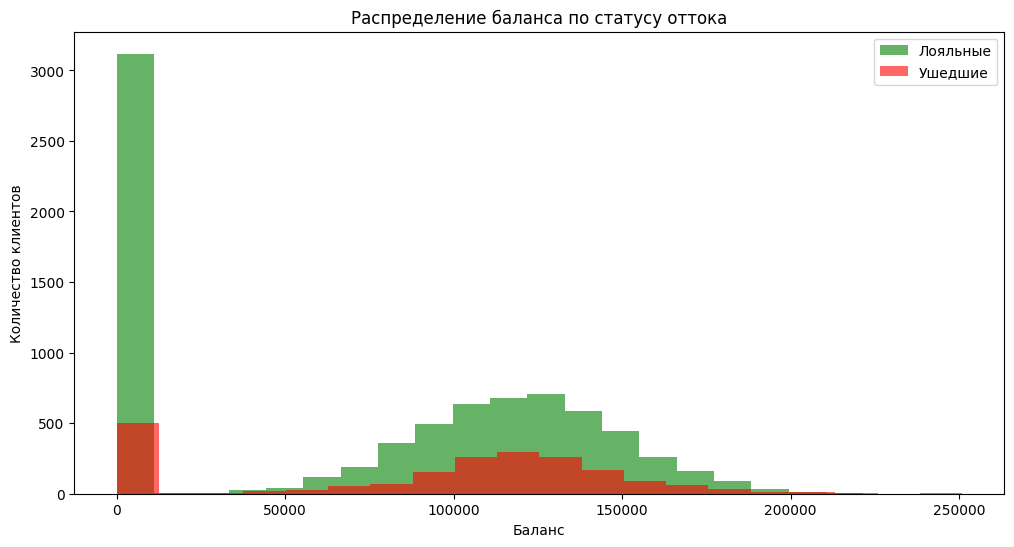

In [168]:
# Фильтруем данные для ушедших и лояльных клиентов
churned_data = data[data['Exited'] == 1]
loyal_data = data[data['Exited'] == 0]

# Строим гистограммы распределения баланса для ушедших и лояльных клиентов
plt.figure(figsize=(12, 6))
plt.hist(loyal_data['Balance'], bins=20, color='green', alpha=0.6, label='Лояльные')
plt.hist(churned_data['Balance'], bins=20, color='red', alpha=0.6, label='Ушедшие')
plt.xlabel('Баланс')
plt.ylabel('Количество клиентов')
plt.title('Распределение баланса по статусу оттока')
plt.legend()
plt.show()

Баланс на счете не является определяющим фактором для принятия решения о том, останется ли клиент лояльным или уйдет. 

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

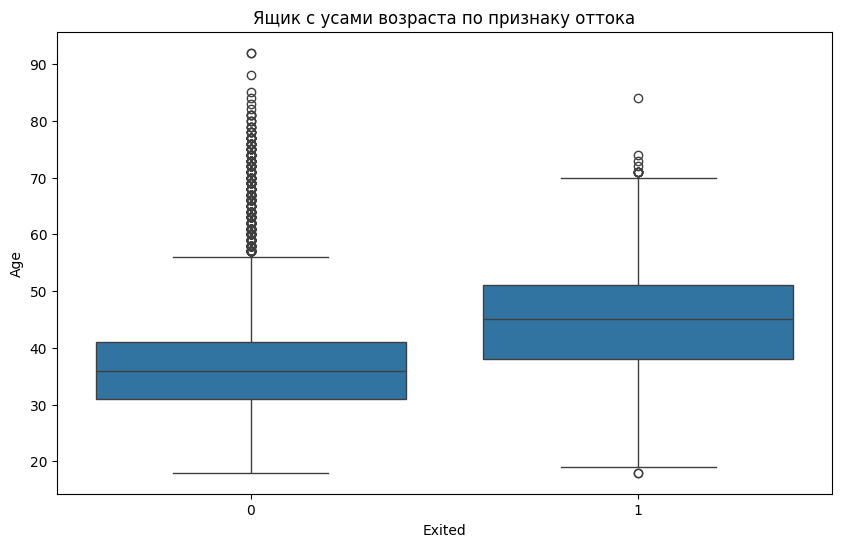

Количество потенциальных выбросов среди ушедших клиентов: 13
Возраст по потенциальным выбросам:
1410    73
2141    18
2553    71
3110    74
3317    71
3531    84
5664    71
6581    71
7058    71
7499    71
9555    72
9572    18
9646    71
Name: Age, dtype: int64


In [169]:
import seaborn as sns

# Построение ящик с усами для возраста в разрезе признака оттока
plt.figure(figsize=(10, 6))
sns.boxplot(x='Exited', y='Age', data=data)
plt.title('Ящик с усами возраста по признаку оттока')
plt.show()

# Анализ выбросов
q1 = data[data['Exited'] == 1]['Age'].quantile(0.25)
q3 = data[data['Exited'] == 1]['Age'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = data[(data['Exited'] == 1) & ((data['Age'] < lower_bound) | (data['Age'] > upper_bound))]
print('Количество потенциальных выбросов среди ушедших клиентов:', len(outliers))
# Вывод возраста по потенциальным выбросам
outliers_age = outliers['Age']
print('Возраст по потенциальным выбросам:')
print(outliers_age)

Больше всего клиентов в возрасте 71 год и больше. Банку следует обратить внимание на пожилых клиентов.

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

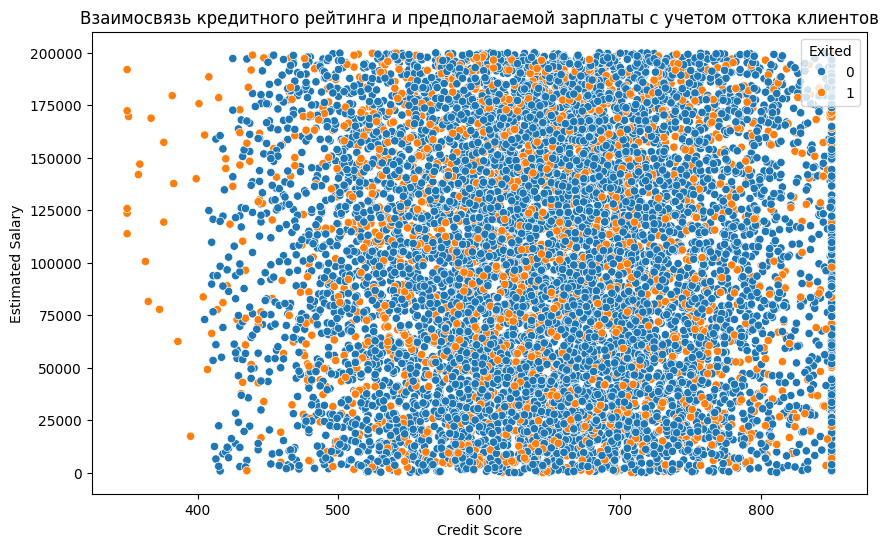

In [170]:
# Построение графика взаимосвязи кредитного рейтинга и предполагаемой зарплаты с учетом оттока
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CreditScore', y='EstimatedSalary', hue='Exited', data=data)
plt.title('Взаимосвязь кредитного рейтинга и предполагаемой зарплаты с учетом оттока клиентов')
plt.xlabel('Credit Score')
plt.ylabel('Estimated Salary')
plt.legend(title='Exited', loc='upper right')
plt.show()

Точки равномерно распределены и не видно явной зависимости или закономерности. Можно сделать вывод, что взаимосвязь между кредитным рейтингом и предполагаемой зарплатой клиента неочевидна.

9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

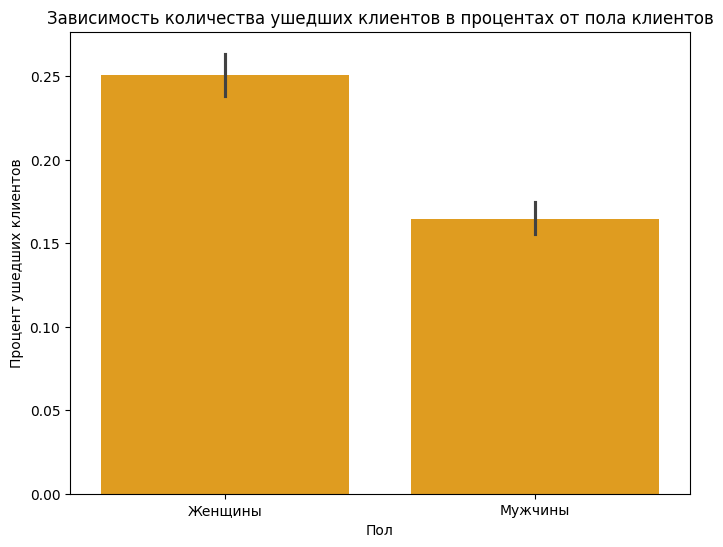

In [171]:
# Расчет процента ушедших клиентов для каждого пола
data['Gender'] = data['Gender'].map({'Male': 'Мужчины', 'Female': 'Женщины'})
exited_percentage = data.groupby('Gender')['Exited'].mean() * 100

# Построение графика
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Exited', data=data, color='orange')
plt.xlabel('Пол')
plt.ylabel('Процент ушедших клиентов')
plt.title('Зависимость количества ушедших клиентов в процентах от пола клиентов')
plt.show()

Чаще уходят женщины.

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

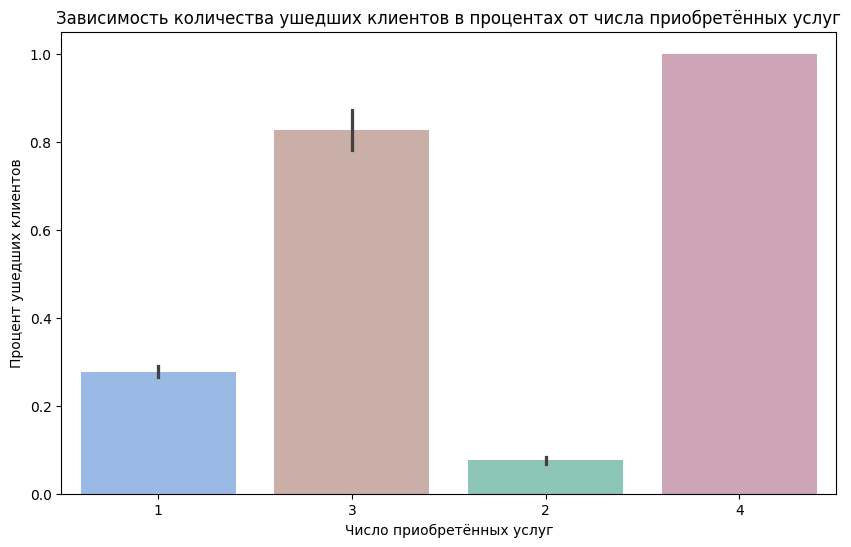

In [172]:
# Подготовка данных для анализа
data['NumOfProducts'] = data['NumOfProducts'].astype(str)  # Преобразуем количество продуктов в строковый формат
exited_percentage = data.groupby('NumOfProducts')['Exited'].mean() * 100

# Построение многоуровневой столбчатой диаграммы
plt.figure(figsize=(10, 6))
sns.barplot(x='NumOfProducts', y='Exited', data=data, color='cornflowerblue')
sns.barplot(x='NumOfProducts', y='Exited', data=data, hue='NumOfProducts', dodge=False, palette='pastel', alpha=0.7)
plt.xlabel('Число приобретённых услуг')
plt.ylabel('Процент ушедших клиентов')
plt.title('Зависимость количества ушедших клиентов в процентах от числа приобретённых услуг')
plt.show()

Больше всего уходит клиентов, которые приобрели 3 или 4 услуги.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

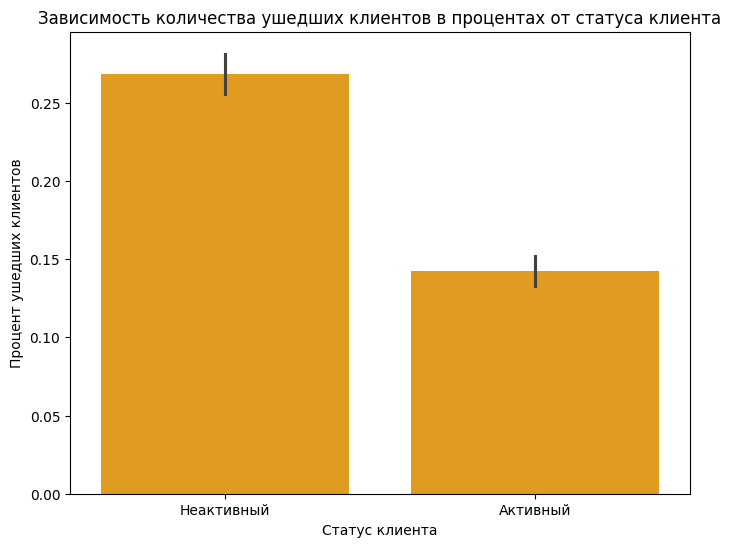

In [173]:
# Создание столбчатой диаграммы для процента оттока среди активных и неактивных клиентов
plt.figure(figsize=(8, 6))
sns.barplot(x='IsActiveMember', y='Exited', data=data, color='orange')
plt.xlabel('Статус клиента')
plt.ylabel('Процент ушедших клиентов')
plt.title('Зависимость количества ушедших клиентов в процентах от статуса клиента')
plt.xticks(ticks=[0, 1], labels=['Неактивный', 'Активный'])

# Добавление процентных значений над столбцами
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

Если статус "Неактивный", то клиент уйдёт с большей вероятностью.

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

C:\Users\Nadezhda\AppData\Local\Temp\ipykernel_11852\1041528990.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


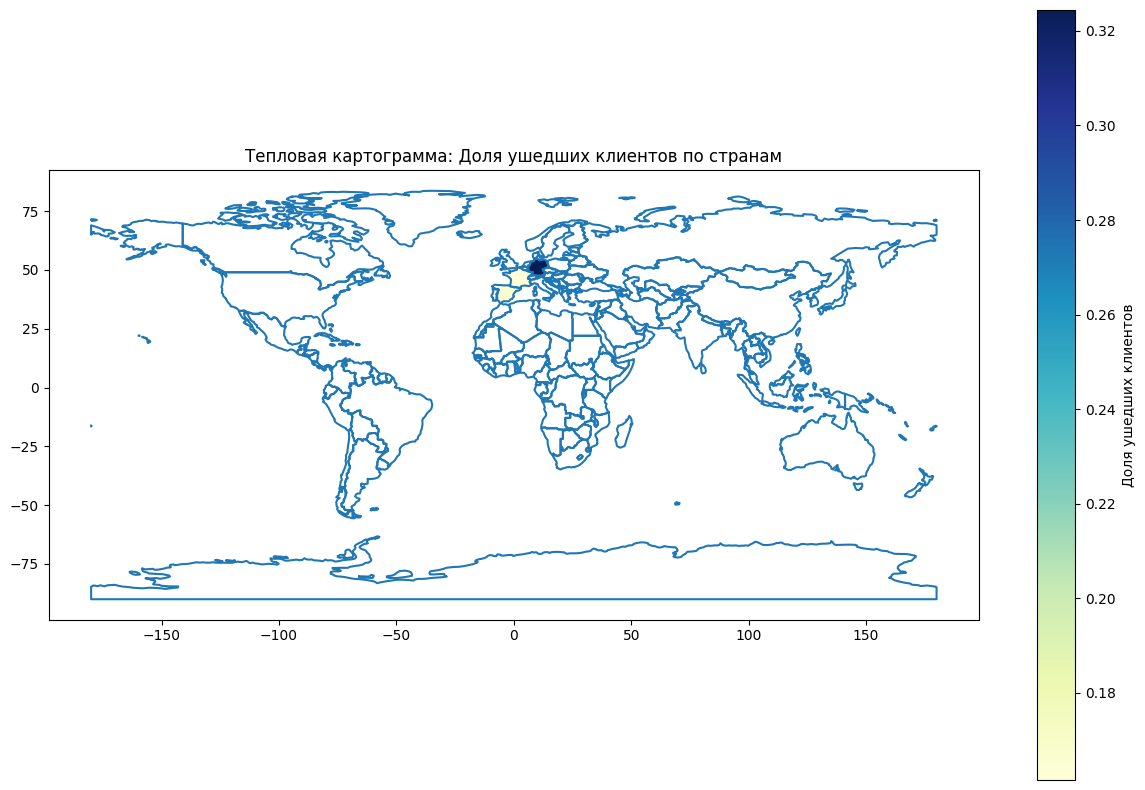

Процент ушедших клиентов в стране France: 16.15%
Процент ушедших клиентов в стране Germany: 32.44%
Процент ушедших клиентов в стране Spain: 16.67%


In [174]:
import geopandas as gpd

# Загрузка мировой карты
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Удаление столбца RowNumber, так как это лишняя информация
data = data.drop('RowNumber', axis=1)

# Группировка данных по странам и подсчет доли ушедших клиентов
country_exited_ratio = data.groupby('Geography')['Exited'].mean().reset_index()

# Объединение данных с информацией о мировой карте
world = world.merge(country_exited_ratio, how='left', left_on='name', right_on='Geography')

# Создание тепловой картограммы
fig, ax = plt.subplots(figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='Exited', cmap='YlGnBu', legend=True, legend_kwds={'label': "Доля ушедших клиентов"}, ax=ax)
plt.title('Тепловая картограмма: Доля ушедших клиентов по странам')
plt.show()

# Вывод процента ушедших клиентов для каждой страны
for idx, row in country_exited_ratio.iterrows():
    country = row['Geography']
    exited_percent = row['Exited'] * 100
    print(f"Процент ушедших клиентов в стране {country}: {exited_percent:.2f}%")

Больше всего людей уходят в Германии. Вероятно, в Германии экономическая ситуация сложнее за счет более высокого уровня жизни, к которому привыкли немцы.

9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

Tenure                0         1         2         3         4         5   \
CreditScoreCat                                                               
Excellent       0.275000  0.208333  0.137255  0.168317  0.131868  0.233333   
Fair            0.217391  0.215596  0.213043  0.216450  0.197248  0.206897   
Good            0.203822  0.203608  0.187342  0.205962  0.195122  0.214470   
Poor            0.226415  0.259398  0.211765  0.212245  0.233202  0.199153   
Very_Poor       0.444444  0.253731  0.151515  0.285714  0.293103  0.149254   

Tenure                6         7         8         9         10  
CreditScoreCat                                                    
Excellent       0.241379  0.127660  0.196078  0.270833  0.254902  
Fair            0.236364  0.171103  0.209016  0.190045  0.205357  
Good            0.182857  0.191892  0.152355  0.194667  0.197802  
Poor            0.179916  0.151261  0.214575  0.251082  0.169492  
Very_Poor       0.225352  0.206349  0.253521  0.229

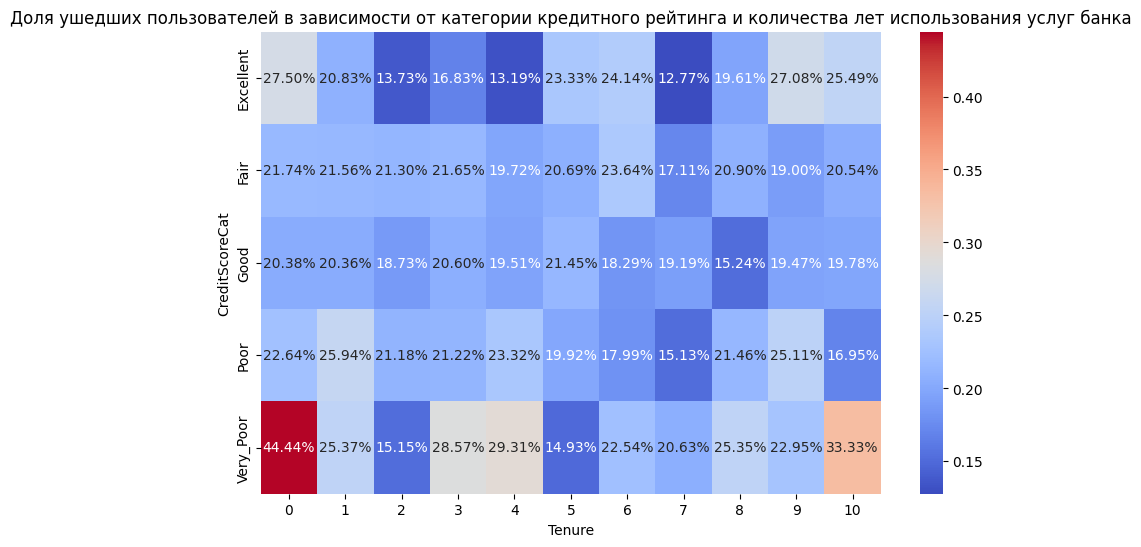

In [178]:
# Функция для перевода числового признака в категориальный
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

# Применение функции к столбцу CreditScore и создание нового признака CreditScoreCat
data['CreditScoreCat'] = data['CreditScore'].apply(get_credit_score_cat)

# Построение сводной таблицы
pivot_table = pd.pivot_table(data, index='CreditScoreCat', columns='Tenure', values='Exited', aggfunc='mean')
print(pivot_table)

# Построение тепловой карты
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".2%")
plt.title('Доля ушедших пользователей в зависимости от категории кредитного рейтинга и количества лет использования услуг банка')
plt.show()